__________________________

## Notebook for ImpulsoGOV Data Analysis Case

# Candidate: Fernando Cirone - 16th November 2024
#### [LinkInd](https://www.linkedin.com/in/fernandocirone/) | [GitHub](https://github.com/thecirocks) | [Portfolio](https://troopl.com/fernandocirone) | [E-mail](mailto:fernando.cirone@hotmail.com) | [WhatsApp](https://api.whatsapp.com/send?phone=5521984316148)

____________________

## 🚨 TASK 🚨 

### Monitoring User Behavior in the Product

To measure the impact of our solutions, we consider it essential to track the success of the tools we provide to our users (SUS managers and healthcare professionals).

In this case study, we will ask you to perform an exploratory analysis to identify usage patterns and draw conclusions about the engagement with Impulso Previne's main tool: the nominal lists.

The exploration should focus on deriving insights related to the following three points:

- First access rates to the nominal lists; <br>
- Comparison of activity between different user roles/positions; <br>
- Behavioral patterns in the usage of the nominal lists; <br>

### What it' the nominal list?

Nominal lists are tools that consolidate data by individual citizen, indicating the status of appointments, exams, procedures, and other aspects.
They enable actions such as filtering, searching, sorting, and also provide the option to print the list for sharing in PDF format or for use on paper.

### Analysis must contain:

**Explanation of Metrics**: Explain the metrics used for the exploration, including definitions and assumptions adopted.

**Visualizations**: Include at least one visualization to support the conclusions for each of the three points of analysis.

**Conclusions**: Present specific insights for each of the three topics. These conclusions may explore comparisons, variations, patterns in historical data, classification into categories, among other aspects. Focus on up to two conclusions you consider most relevant for each of the three points.

### Data Glossary

usuarios_cadastrados_ip: Contains information about users who registered and can access the logged-in area of the product.

- usuario_id: unique identifier of the user <br>
- data_criacao_cadastro: user registration creation date <br>
- municipio, cargo: user's municipality and role <br>


dias_ativo_usuarios_ip: Data about the days users were active in the logged-in area of the product. Each row represents a day that a user was active on the platform.

- usuario_id: unique identifier of the user <br>
- data_ativo: user activity date <br>
- acessou_listas_nominais: true if the user accessed at least one nominal list <br>
- clicks_imprimir_lista: number of clicks to print a nominal list <br>
- clicks_filtrar_lista: number of clicks to apply a filter to the nominal list <br>

____________________

# 0. Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Quick analysis of the data

In [3]:
df1 = pd.read_csv('data/usuarios_cadastrados_ip.csv', delimiter=',')
df1.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023
1,877b90f4-d597-4348-a2e7-e29c4f3b3f4e,Marechal Thaumaturgo - AC,Coordenação APS,24/10/2023


In [4]:
df2 = pd.read_csv('data/dias_ativo_usuarios_ip.csv', delimiter=',')
df2.head(2)

,usuario_id,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,dec6bb91-05a8-4709-a7af-ab2aba6d1f3e,18/12/2023,True,0,0
1,0a83d262-3630-41a5-b36f-a48ebe9f80e2,18/12/2023,True,0,0


In [5]:
# As we can see above: there is one key that matches the both dfs: usuario_id - merge both dfs in one to enhance analysis

In [6]:
# But first quick check if there is null or duplicates

In [7]:
#df1

In [8]:
df1.head(1)

,usuario_id,municipio,cargo,data_criacao_cadastro
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023


In [9]:
df1.shape

(695, 4)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   usuario_id             695 non-null    object
 1   municipio              695 non-null    object
 2   cargo                  695 non-null    object
 3   data_criacao_cadastro  695 non-null    object
dtypes: object(4)
memory usage: 21.8+ KB


In [11]:
df1.duplicated().value_counts()

False    695
Name: count, dtype: int64

In [12]:
df1.describe()

,usuario_id,municipio,cargo,data_criacao_cadastro
count,695,695,695,695
unique,695,70,2,106
top,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Itabira - MG,Coordenação de Equipe,16/3/2023
freq,1,38,568,55


In [13]:
df1.isnull().value_counts()

usuario_id  municipio  cargo  data_criacao_cadastro
False       False      False  False                    695
Name: count, dtype: int64

In [14]:
df1.isna().sum()

usuario_id               0
municipio                0
cargo                    0
data_criacao_cadastro    0
dtype: int64

In [15]:
#Conclusion df1: df1 has no null, no duplicated, has 4 features and 695 rows

In [16]:
#df2 analysis:

In [17]:
df2.head(1)

,usuario_id,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,dec6bb91-05a8-4709-a7af-ab2aba6d1f3e,18/12/2023,True,0,0


In [18]:
df2.shape

(20777, 5)

In [19]:
df2["acessou_listas_nominais"].value_counts()

acessou_listas_nominais
True     18763
False     2014
Name: count, dtype: int64

In [20]:
df2["clicks_imprimir_lista"].value_counts()

clicks_imprimir_lista
0      18368
1        963
2        468
3        243
4        183
5        112
6         93
7         54
8         43
10        34
11        29
9         29
12        18
17        15
13        15
16        12
14        11
19        10
18         9
21         8
22         8
15         8
20         5
24         5
26         4
34         3
32         3
28         2
31         2
27         2
25         2
49         2
41         1
37         1
53         1
48         1
60         1
55         1
72         1
30         1
234        1
40         1
29         1
38         1
63         1
86         1
Name: count, dtype: int64

In [21]:
df2["clicks_filtrar_lista"].value_counts()

clicks_filtrar_lista
0      17956
1        836
2        481
3        318
4        203
       ...  
249        1
52         1
53         1
87         1
93         1
Name: count, Length: 62, dtype: int64

In [22]:
df2.shape

(20777, 5)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20777 entries, 0 to 20776
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   usuario_id               20777 non-null  object
 1   data_ativo               20777 non-null  object
 2   acessou_listas_nominais  20777 non-null  bool  
 3   clicks_imprimir_lista    20777 non-null  int64 
 4   clicks_filtrar_lista     20777 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 669.7+ KB


In [24]:
df2.duplicated().value_counts()

False    20777
Name: count, dtype: int64

In [25]:
df2.isna().sum()

usuario_id                 0
data_ativo                 0
acessou_listas_nominais    0
clicks_imprimir_lista      0
clicks_filtrar_lista       0
dtype: int64

In [26]:
#Conclusion df2: df2 has no null, no duplicated, has 5 features (1 boolean) and 20.777 rows

In [27]:
#With this conclusion above we can merge the two lists without any concern

In [28]:
#we must merge "inner" because we won't use any data with missing info in any of the two dfs.
# and then proceed to deeper analysis: is there any typo, error or trash info in each feature?

In [29]:
df = df1.merge(
                df2,
                left_on="usuario_id", right_on="usuario_id",
                how="inner"
)

df.head(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,11/8/2023,True,0,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,14/2/2024,True,0,2


In [30]:
df.tail(2)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
20775,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,4/11/2024,True,0,1
20776,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,14/5/2024,True,0,0


In [31]:
#Before any conclusion, obtain 2 new feature: state e delta_time

In [32]:
#state:

In [33]:
df["municipio"][0][-2:]

'SP'

In [34]:
len(df["municipio"])

20777

In [35]:
df["municipio"][100][-2:]

'MA'

In [36]:
df["estado"] = df["municipio"].map(lambda x: x[-2:])
df.head(1)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,11/8/2023,True,0,0,SP


In [37]:
#delta time:

In [38]:
print(df["data_criacao_cadastro"].dtype)
print(df["data_ativo"].dtype)

object
object


In [39]:
#Convert to datetime to get delta

In [40]:
df["data_criacao_cadastro"] = pd.to_datetime(df["data_criacao_cadastro"], dayfirst=True)
df["data_ativo"] = pd.to_datetime(df["data_ativo"], dayfirst=True)

In [41]:
print(df["data_criacao_cadastro"].dtype)
print(df["data_ativo"].dtype)

datetime64[ns]
datetime64[ns]


In [42]:
df["delta_time"] = df["data_ativo"] - df["data_criacao_cadastro"]
df.head(4)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-08-11,True,0,0,SP,141 days
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2024-02-14,True,0,2,SP,328 days
2,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-12-13,True,0,0,SP,265 days
3,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-09-05,True,0,0,SP,166 days


In [43]:
df["delta_time"] = df["delta_time"].dt.days

In [44]:
#Ordering the dataframe for latter create a flag to get only first access!

In [45]:
df_ordered = df.sort_values(by=['usuario_id', 'delta_time'])
df_ordered.head(15)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1
13748,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-08,True,0,2,MG,4
13729,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-09,True,0,1,MG,5
13755,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-10,True,0,0,MG,6
13728,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-11,True,0,0,MG,7
13763,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-12,True,0,1,MG,8
13741,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-15,True,0,0,MG,11
13757,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-16,True,0,0,MG,12
13736,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-27,True,0,0,MG,23
13749,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-30,True,0,0,MG,26


In [46]:
#Criando a "mascara"/flag de first access
#Cumcount() >>>> Contagem cumulativa !
df_ordered['first_access'] = df_ordered.groupby('usuario_id').cumcount().apply(lambda x: 1 if x == 0 else 0)
df_ordered.head(5)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,first_access
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1,1
13748,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-08,True,0,2,MG,4,0
13729,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-09,True,0,1,MG,5,0
13755,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-10,True,0,0,MG,6,0
13728,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-11,True,0,0,MG,7,0


In [47]:
df_first_access = df_ordered[df_ordered['first_access'] == 1]

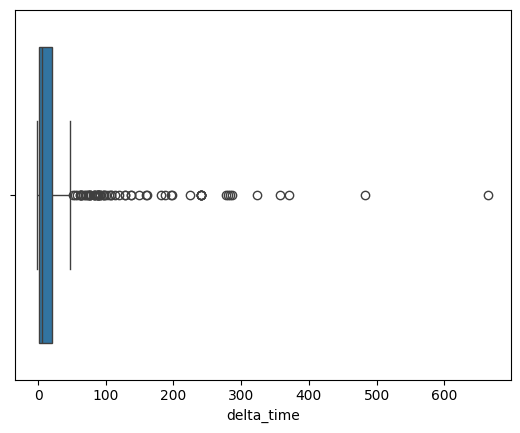

In [48]:
sns.boxplot(x=df_first_access["delta_time"]);

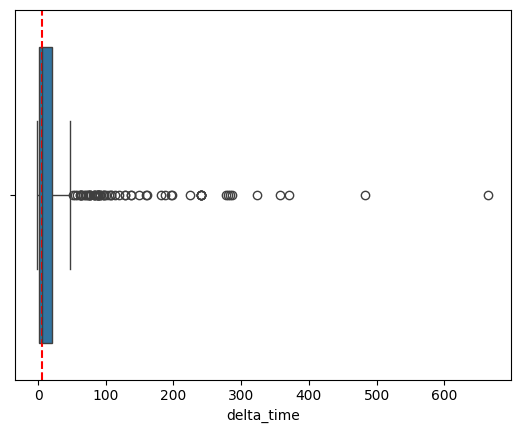

In [49]:
sns.boxplot(x=df_first_access["delta_time"])

plt.axvline(df_first_access["delta_time"].median(), color="red", linestyle="--");

In [50]:
df_first_access["delta_time"].describe()

count    575.000000
mean      25.344348
std       59.865293
min       -1.000000
25%        1.000000
50%        6.000000
75%       21.000000
max      665.000000
Name: delta_time, dtype: float64

In [51]:
df_first_access[["data_criacao_cadastro", "data_ativo"]][df_first_access["delta_time"] == -1]

,data_criacao_cadastro,data_ativo
18389,2024-03-19,2024-03-18


In [52]:
df_first_access["delta_time"] = df_first_access["delta_time"].map(lambda x: 0 if x == -1 else x)

/tmp/ipykernel_260089/485611645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_access["delta_time"] = df_first_access["delta_time"].map(lambda x: 0 if x == -1 else x)


In [53]:
df_first_access[["data_criacao_cadastro", "data_ativo"]][df_first_access["delta_time"] == -1]

,data_criacao_cadastro,data_ativo


In [54]:
df_first_access.head(5)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,first_access
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1,1
14984,009a2ef8-ee98-4c4d-b53a-6407abc03715,Salvaterra - PA,Coordenação APS,2023-08-17,2023-08-17,False,0,0,PA,0,1
16012,0103a1d1-96c8-4d98-b263-0549294aff13,Juquitiba - SP,Coordenação de Equipe,2022-11-08,2022-11-09,True,0,0,SP,1,1
4533,013e6d7a-4b86-47a3-972e-4c046dc4903b,Palmeira das Missões - RS,Coordenação de Equipe,2023-10-24,2023-11-13,True,0,0,RS,20,1
2739,021f43b9-c167-44b3-bc42-5420212df999,Paes Landim - PI,Coordenação APS,2023-05-09,2023-05-12,True,0,0,PI,3,1


In [55]:
df_first_access["acessou_listas_nominais"].value_counts()

acessou_listas_nominais
True     501
False     74
Name: count, dtype: int64

In [56]:
df_first_access["delta_time"].mean()

np.float64(25.346086956521738)

In [57]:
df_first_access["delta_time"].median()

np.float64(6.0)

In [58]:
df_first_access["delta_time"].mode()

0    1
Name: delta_time, dtype: int64

In [59]:
df["usuario_id"].nunique()

575

In [60]:
df["estado"].nunique()

17

In [61]:
df["municipio"].nunique()

70

In [62]:
df["cargo"].value_counts()

cargo
Coordenação de Equipe    17601
Coordenação APS           3176
Name: count, dtype: int64

In [63]:
len(df[(df["cargo"] == "Coordenação de Equipe") & (df["acessou_listas_nominais"] == True)]) / len(df[(df["cargo"] == "Coordenação de Equipe")])

0.9069371058462588

In [64]:
len(df[(df["cargo"] == "Coordenação APS") & (df["acessou_listas_nominais"] == True)]) / len(df[(df["cargo"] == "Coordenação APS")])

0.8816120906801007

In [65]:
#Sanity check if there is any typo in NON-acces nominal list & Clicks

In [66]:
df[(df["acessou_listas_nominais"] == False)]["clicks_imprimir_lista"].value_counts()

clicks_imprimir_lista
0    2014
Name: count, dtype: int64

In [67]:
df[(df["acessou_listas_nominais"] == False)]["clicks_filtrar_lista"].value_counts()

clicks_filtrar_lista
0    2014
Name: count, dtype: int64

In [68]:
# df[(df["acessou_listas_nominais"] == True)]["clicks_imprimir_lista"].value_counts().sum()

In [69]:
# df[(df["acessou_listas_nominais"] == True)]["clicks_filtrar_lista"].value_counts().sum()

Analise do dataframe: <br>
    - Usuarios - quantos usuários unicos? 575 usuários únicos <br>
    - cidades - Há todas as 5571 cidades do Brasil? Não, 70 cidades <br>
    - Estados - Há todos os 26+1 Estados do Brasil? Não, 17 Estados <br>
    - Quantos e quais cargos? Há apenas 2 cargos: Coordenação de Equipe e Coordenação APS <br>
    - Mix de quem usa a lista nominal e mix de quem não usa? <br>
          - Mix do Cargo de Coordenação de Equipe que usa lista: 90% <br>
          - Mix do Cargo de Coordenação APS que usa lista: 88% <br>

In [70]:
#Quais e quantos cargos?
#Nivel Brasil, Qual Estado/municipio que mais acessou listas nominais?
#Nivel Brasil, Qual cargo que mais acessou as listas nominais?
#No Estado que mais se acessou, qual cargo?

#quanto tempo , quem criou perfil e acessou as listas nomiais demorou para acessar?
#desses, qual mix <24h e mix >24h?
#Entendo ser crítico quem demorou mais de 24h para acessar as listas pois cai no esquecimento - nao podemos deixar isso acontecer
#Criar um sistema automatizado para notificar por e-mail e WhatsApp que a pessoa criou a lista e para acessa-la

#Por que?

#Nivel Brasil, Qual Estado/municipio que MENOS acessou listas nominais?

#Por que? Como incentivar maior uso nas listas nominais?

In [71]:
#Ações: baixo custo e alto impacto: quem está acessando as listas nominais mas nao ta clicando?

# 1. First access rates to the nominal lists;:
#### 1.1 quanto tempo , quem criou perfil e acessou as listas nomiais demorou para acessar?
#### 1.2 desses, qual mix <24h e mix >24h?
#### Sugestão: Entendo ser crítico quem demorou mais de 24h para acessar as listas pois cai no esquecimento - nao podemos deixar isso acontecer Criar um sistema automatizado para notificar por e-mail e WhatsApp que a pessoa criou a lista e para acessa-la

In [72]:
df_first_access["delta_time"].describe()

count    575.000000
mean      25.346087
std       59.864541
min        0.000000
25%        1.000000
50%        6.000000
75%       21.000000
max      665.000000
Name: delta_time, dtype: float64

In [73]:
df_first_access["delta_time"].median()

np.float64(6.0)

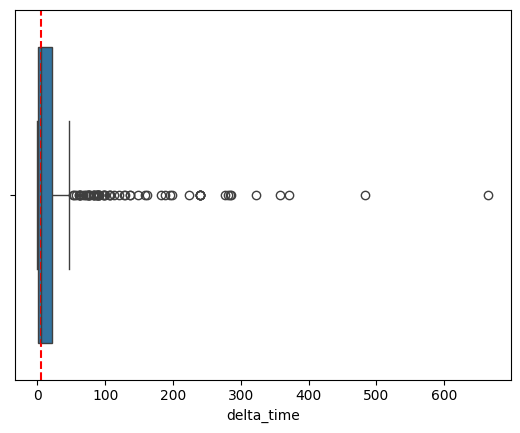

In [74]:
sns.boxplot(x=df_first_access["delta_time"])

plt.axvline(df_first_access["delta_time"].median(), color="red", linestyle="--");

In [75]:
df_first_access.head(4)

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista,estado,delta_time,first_access
13761,0077e9df-39d3-41bc-aa57-3953e894bcf9,Três Marias - MG,Coordenação de Equipe,2024-04-04,2024-04-05,True,0,1,MG,1,1
14984,009a2ef8-ee98-4c4d-b53a-6407abc03715,Salvaterra - PA,Coordenação APS,2023-08-17,2023-08-17,False,0,0,PA,0,1
16012,0103a1d1-96c8-4d98-b263-0549294aff13,Juquitiba - SP,Coordenação de Equipe,2022-11-08,2022-11-09,True,0,0,SP,1,1
4533,013e6d7a-4b86-47a3-972e-4c046dc4903b,Palmeira das Missões - RS,Coordenação de Equipe,2023-10-24,2023-11-13,True,0,0,RS,20,1


Important: <br>
    - 0 for NON access in nominal list <br>
    - 1 for access YES! <br>

In [76]:
df_first_access["acessou_listas_nominais"] = df["acessou_listas_nominais"].apply(lambda x: 1 if x == True else 0)
df_first_access["acessou_listas_nominais"].unique()

/tmp/ipykernel_260089/2663819793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_access["acessou_listas_nominais"] = df["acessou_listas_nominais"].apply(lambda x: 1 if x == True else 0)


array([1, 0])

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [78]:
X = df_first_access["delta_time"].values.reshape(-1, 1) #ajustar o shape pois DF estava em espaço >2Bi
y = df_first_access["acessou_listas_nominais"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8695652173913043

In [80]:
decision_boundary = -model.intercept_[0] / model.coef_[0][0]
decision_boundary

np.float64(-2083.85848511682)

In [81]:
proba = model.predict_proba(X_test)
print(proba)

[[0.12771913 0.87228087]
 [0.12965727 0.87034273]
 [0.13048078 0.86951922]
 [0.11707335 0.88292665]
 [0.12711225 0.87288775]
 [0.12924717 0.87075283]
 [0.12185782 0.87814218]
 [0.12863409 0.87136591]
 [0.12955464 0.87044536]
 [0.13017144 0.86982856]
 [0.13058403 0.86941597]
 [0.12610625 0.87389375]
 [0.12234542 0.87765458]
 [0.12863409 0.87136591]
 [0.1287361  0.8712639 ]
 [0.12843029 0.87156971]
 [0.13048078 0.86951922]
 [0.13048078 0.86951922]
 [0.13058403 0.86941597]
 [0.13006847 0.86993153]
 [0.1303776  0.8696224 ]
 [0.12853216 0.87146784]
 [0.12975996 0.87024004]
 [0.13017144 0.86982856]
 [0.12914482 0.87085518]
 [0.13058403 0.86941597]
 [0.13027449 0.86972551]
 [0.12421362 0.87578638]
 [0.1303776  0.8696224 ]
 [0.11868151 0.88131849]
 [0.13017144 0.86982856]
 [0.13058403 0.86941597]
 [0.1303776  0.8696224 ]
 [0.12701134 0.87298866]
 [0.12904253 0.87095747]
 [0.13017144 0.86982856]
 [0.13027449 0.86972551]
 [0.12812509 0.87187491]
 [0.13058403 0.86941597]
 [0.13058403 0.86941597]


In [96]:
proba_no_access = proba[:,0]
proba_no_access

array([0.12771913, 0.12965727, 0.13048078, 0.11707335, 0.12711225,
       0.12924717, 0.12185782, 0.12863409, 0.12955464, 0.13017144,
       0.13058403, 0.12610625, 0.12234542, 0.12863409, 0.1287361 ,
       0.12843029, 0.13048078, 0.13048078, 0.13058403, 0.13006847,
       0.1303776 , 0.12853216, 0.12975996, 0.13017144, 0.12914482,
       0.13058403, 0.13027449, 0.12421362, 0.1303776 , 0.11868151,
       0.13017144, 0.13058403, 0.1303776 , 0.12701134, 0.12904253,
       0.13017144, 0.13027449, 0.12812509, 0.13058403, 0.13058403,
       0.12224776, 0.1303776 , 0.13058403, 0.12843029, 0.12721322,
       0.1280235 , 0.12711225, 0.1303776 , 0.12904253, 0.12975996,
       0.12924717, 0.11992414, 0.13027449, 0.12480864, 0.12822675,
       0.13048078, 0.1303776 , 0.12421362, 0.12955464, 0.12975996,
       0.1303776 , 0.1287361 , 0.12283469, 0.13048078, 0.13058403,
       0.12986273, 0.13048078, 0.09679759, 0.12945208, 0.13058403,
       0.1303776 , 0.13058403, 0.12945208, 0.11934923, 0.12792

In [97]:
intercept = model.intercept_
coef = model.coef_
print(intercept)
print(coef)

[1.89580472]
[[0.00090976]]


In [98]:
limit_50 = intercept / coef
limit_50 = limit_50 *-1
limit_50 = limit_50[0][0]
print(limit_50)

-2083.85848511682


In [99]:
values = np.linspace(X.min(), X.max()+5000, 100).reshape(-1, 1)
probabilities = model.predict_proba(values)[:, 0]

Text(-2083.85848511682, 0.5, '-2083.86')

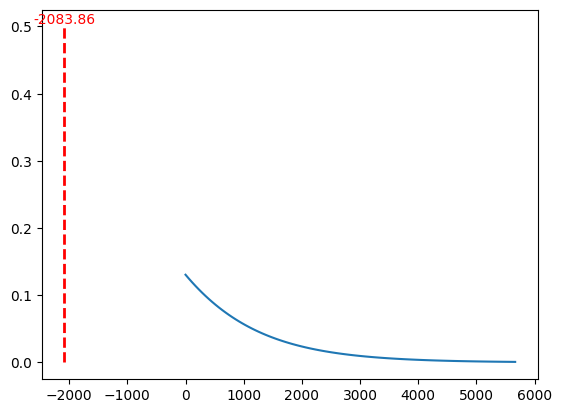

In [100]:
plt.plot(values, probabilities)
plt.plot([limit_50, limit_50], [0, 0.5], color='red', linestyle='dashed', linewidth=2)
plt.axhline(y=0.5, xmax=limit_50 / values.max(), color='red', linestyle='dashed', linewidth=2)
plt.text(limit_50, 0.5, f'{limit_50:.2f}', color='red', fontsize=10, ha='center', va='bottom')

In [101]:
print(X.min(), X.max())

0 665


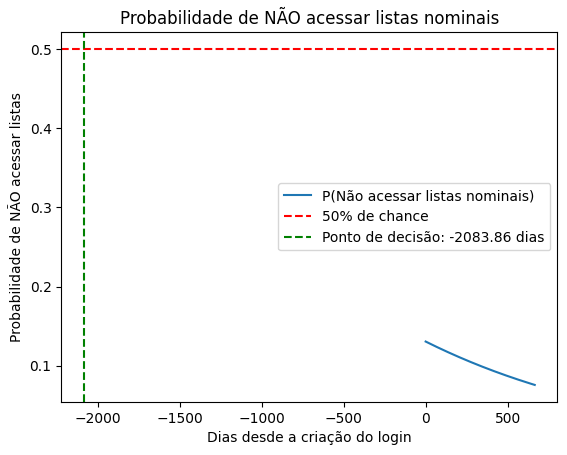

In [95]:
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
probs = model.predict_proba(X_range)[:, 0]  # Probabilidade de y=0

# Plotar
plt.plot(X_range, probs, label="P(Não acessar listas nominais)")
plt.axhline(0.5, color="red", linestyle="--", label="50% de chance")
plt.axvline(decision_boundary, color="green", linestyle="--", label=f"Ponto de decisão: {decision_boundary:.2f} dias")
plt.xlabel("Dias desde a criação do login")
plt.ylabel("Probabilidade de NÃO acessar listas")
plt.legend()
plt.title("Probabilidade de NÃO acessar listas nominais")
plt.show()

# 2. Comparison of activity between different user roles/positions:
#### 2.1 Nivel Brasil, Qual cargo que mais acessou as listas nominais?
#### 2.2 Nivel Brasil, Qual cargo que MENOS acessou as listas nominais?
#### Sugestão: entender o porque?

# 3. Behavioral patterns in the usage of the nominal lists;
#### 3.1 Quantos cliques (seja imprimir ou ) o cara que fez cadastro ha 24 fez ao longo de todas as jornadas?
#### 3.2 Baixo custo e alto impacto: quem está acessando as listas nominais e está fazendo 0 clique?
####  Correlação de Cliques por tempo de criação de perfil

#### Correlação de Cliques por tempo de criação de perfil
#### Sugestão: xxx

# JOB DONE ! 💪

________________________________________________

## Made by: Fernando Cirone.
#### [LinkInd](https://www.linkedin.com/in/fernandocirone/) | [GitHub](https://github.com/thecirocks) | [Portfolio](https://troopl.com/fernandocirone) | [E-mail](mailto:fernando.cirone@hotmail.com) | [WhatsApp](https://api.whatsapp.com/send?phone=5521984316148)